# TITLE: DATACO GLOBAL SUPPLY CHAIN ANALYSIS
---

#ANALYSIS GOAL

Goald : making a descriptive analyst on DataCo SMART supply chain datasets to find insights and places to improve.

Plan: Cleaning data - EDA - categorizing issues - insights & suggestion.

#About the dataset

A DataSet of Supply Chains used by the company DataCo Global was used for the analysis.
Areas of important registered activities : Provisioning, Production, Sales, Commercial Distribution.

## **Data structure**
- Type	:  Type of transaction made
- Days for shipping (real)	:  Actual shipping days of the purchased product
- Days for shipment (scheduled)	:  Days of scheduled delivery of the purchased product
- Benefit per order	:  Earnings per order placed
- Sales per customer	:  Total sales per customer made per customer
- Delivery Status	:  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time
- Late_delivery_risk	:  Categorical variable that indicates if sending is late (1), it is not late (0).
- Category Id	:  Product category code
- Category Name	:  Description of the product category
- Customer City	:  City where the customer made the purchase
- Customer Country	:  Country where the customer made the purchase
- Customer Email	:  Customer's email
- Customer Fname	:  Customer name
- Customer Id	:  Customer ID
- Customer Lname	:  Customer lastname
- Customer Password	:  Masked customer key
- Customer Segment	:  Types of Customers: Consumer , Corporate , Home Office
- Customer State	:  State to which the store where the purchase is registered belongs
- Customer Street	:  Street to which the store where the purchase is registered belongs
- Customer Zipcode	:  Customer Zipcode
- Department Id	:  Department code of store
- Department Name	:  Department name of store
- Latitude	:  Latitude corresponding to location of store
- Longitude	:  Longitude corresponding to location of store
- Market	:  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
- Order City	:  Destination city of the order
- Order Country	:  Destination country of the order
- Order Customer Id	:  Customer order code
- order date (DateOrders)	:  Date on which the order is made (A.K.A DateOrders)
- Order Id	:  Order code
- Order Item Cardprod Id	:  Product code generated through the RFID reader
- Order Item Discount	:  Order item discount value
- Order Item Discount Rate	:  Order item discount percentage
- Order Item Id	:  Order item code
- Order Item Product Price	:  Price of products without discount
- Order Item Profit Ratio	:  Order Item Profit Ratio
- Order Item Quantity	:  Number of products per order
- Sales	:  Value in sales
- Order Item Total	:  Total amount per order
- Order Profit Per Order	:  Order Profit Per Order
- Order Region	:  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA
- Order State	:  State of the region where the order is delivered
- Order Status	:  COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW
- Product Card Id	:  Product code
- Product Category Id	:  Product category code
- Product Description	:  Product Description
- Product Image	:  Link of visit and purchase of the product
- Product Name	:  Product Name
- Product Price	:  Product Price
- Product Status	:  Status of the product stock :If it is 1 not available , 0 the product is available
- Shipping date (DateOrders)	:  Exact date and time of shipment (A.K.A DateShipping)
- Shipping Mode	:  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day

##Acknowledgements & Source
Fabian Constante,

Fabian Constante
Instituto Politecnico de Leiria Escola Superior de Tecnologia e Gestao
Contribution: Master interested in topics related to Big Data
Fernando Silva, António Pereira

https://data.mendeley.com/datasets/8gx2fvg2k6/5

---

# Setting up environment & Overview of the dataset

Set up the environments and load data for the analysis.

In [160]:
#import libraries before analysing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import ticker for formatting Axis Tick Labels
import matplotlib.ticker as ticker

In [161]:
df = pd.read_csv('/content/drive/MyDrive/SIT/DataCoSupplyChainDataset.csv', encoding='latin1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


(!) While trying to read csv data an error pop-up ('utf-8' cant decode...), as pandas usually read csv with UTF-8 encoding but this data is encoded latin1. In this case, specifying encoding='latin1' is required.

In [162]:
#Start with checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [163]:
#check value of Product Status, note that 0 means stock available and reverse.
df['Product Status'].sum()

np.int64(0)

The result 0, which means all stock available (This column is mono-value).

In [164]:
#Check difference between Benefit per order & Order Profit Per Order, if result = 0, the value of two columns are the same
print((df['Benefit per order']-df['Order Profit Per Order']).sum())

0.0


The result = 0, which means those 2 columns have exact the same values. Let's remove 'Benefit per order' and keep 'Order Profit Per Order'.

In [165]:
#Check difference between Benefit per order & Order Profit Per Order, if result = 0, the value of two columns are the same
print((df['Order Item Product Price']-df['Product Price']).sum())

0.0


The result = 0, which means those 2 columns have exact the same values. Let's remove 'Order Item Product Price' and keep 'Product Price'.

*Key findings:
- Some columns are either blank or missing value
- dtype should be converted from object to category/string type for optimiztion.
- The following columns will be dropped:
  - Customer Email, Customer Password, Customer Zipcode, Order Zipcode, Customer Fname, Customer Lname, Customer Street ./. **Reason**: privacy info
  - Benefit per order, Order Item Product Price, Product Description, Product Image, Category Id (duplicate info ),  Department Id (used Department name instead), Order Customer Id, Order Item Cardprod Id, Order Item Id, Product Card Id, Product Category Id, Product Status (mono-value)./. **Reason**: the remaining columns can replace.

---

# DATA CLEANING

## Remove un-neccessary columns

In [166]:
#dropping un-neccessary columns:
not_use_col = ['Benefit per order','Order Item Product Price','Customer Email','Customer Password','Customer Zipcode','Order Zipcode',
            'Product Description','Product Image','Category Id','Customer Fname',
            'Customer Lname', 'Customer Street', 'Department Id','Order Customer Id',
           'Order Item Cardprod Id','Order Item Id','Product Card Id','Product Category Id','Product Status']
df = df.drop(columns=not_use_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Department Name               

Note: there is no missing value to fix.

In [167]:
#fix dtype for string columns.
str_col = ['Customer City','Customer Country','Customer State','Department Name','Market',
       'Order City', 'Order Country','Order Region', 'Order State','Product Name']
df[str_col]=df[str_col].astype('string')

## Convert dtypes for object columns

These columns should be category:

'Type', 'Delivery Status', 'Category Name', 'Customer Segment', 'Order Status', 'Shipping Mode'

In [168]:
#set dtype category for columns as below:
categ_col = ['Type', 'Delivery Status','Category Name', 'Customer Segment', 'Order Status', 'Shipping Mode']
df[categ_col] = df[categ_col].astype('category')

Columns 'order date' and 'shipping date' also need converting from object to datetime dtype

In [169]:
df['DateOrders'] = df['order date (DateOrders)']
df['DateOrders'] = pd.to_datetime(df['DateOrders'], errors='coerce')
df['DateOrders'].head()

,DateOrders
0,2018-01-31 22:56:00
1,2018-01-13 12:27:00
2,2018-01-13 12:06:00
3,2018-01-13 11:45:00
4,2018-01-13 11:24:00


In [170]:
df['DateShipping'] = df['shipping date (DateOrders)']
df['DateShipping'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')
df['DateShipping'].head()

,DateShipping
0,2018-02-03 22:56:00
1,2018-01-18 12:27:00
2,2018-01-17 12:06:00
3,2018-01-16 11:45:00
4,2018-01-15 11:24:00


In [171]:
#drop old columns
df = df.drop(columns=['order date (DateOrders)','shipping date (DateOrders)'])

In [172]:
#count the duplicated info
df.duplicated().sum()

np.int64(0)

As result 0, we don't have duplicate to clean.

##Result

Data should not have missing value and proper Dtype. Let's check!

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  category      
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Sales per customer             180519 non-null  float64       
 4   Delivery Status                180519 non-null  category      
 5   Late_delivery_risk             180519 non-null  int64         
 6   Category Name                  180519 non-null  category      
 7   Customer City                  180519 non-null  string        
 8   Customer Country               180519 non-null  string        
 9   Customer Id                    180519 non-null  int64         
 10  Customer Segment               180519 non-null  category      
 11  

---

# EXPLORATORY DATA ANALYSIS
---

##Descriptive Analytics
Understand past performance using historical data.

In [174]:
#display the whole table and taking a glance at our data
with pd.option_context('display.max_columns', None):
        print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Sales per customer   Delivery Status  Late_delivery_risk   Category Name  \
0          314.640015  Advance shipping                   0  Sporting Goods   
1          311.359985     Late delivery                   1  Sporting Goods   
2          309.720001  Shipping on time                   0  Sporting Goods   
3          304.809998  Advance shipping                   0  Sporting Goods   
4          298.250000  Advance shipping                   0  Sporting Goods   

  Customer City Customer Country  Customer Id Customer Segment Customer State  \
0        Ca

#####Convert datetime data from DateOrders into date and month only

In [175]:
#convert date-time data from DateOrders into date only
df['date_of_order'] = pd.to_datetime(df['DateOrders']).dt.date
df['date_of_order'].head()

,date_of_order
0,2018-01-31
1,2018-01-13
2,2018-01-13
3,2018-01-13
4,2018-01-13


In [176]:
#convert date-time data from DateOrders into date format %Y-%m
df['month_of_order'] = df['DateOrders'].dt.strftime('%Y-%m')
df['month_of_order'].head()

,month_of_order
0,2018-01
1,2018-01
2,2018-01
3,2018-01
4,2018-01


#####Refining sales data

Before analysing Sales data. We should pay attention that some order has the status 'CANCELED', 'ON_HOLD' and 'SUSPECTED_FRAUD'.
The record for Sales will not be practical with these. So we have to filter them out

In [177]:
#checking for Order status unique values:
df['Order Status'].unique()

['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED', 'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW']
Categories (9, object): ['CANCELED', 'CLOSED', 'COMPLETE', 'ON_HOLD', ..., 'PENDING',
                         'PENDING_PAYMENT', 'PROCESSING', 'SUSPECTED_FRAUD']

In [178]:
#adding a columns name refined_sales. When order status are" canceled, on_hold or suspected_fraud will be 0, the rest remain original value.
df['refined_sales'] = df['Sales']

# Replace values in 'refined_sales' with '0' where 'Order Status' is in canceled, on_hold or suspected_fraud
df.loc[df['Order Status'].isin(['CANCELED','ON_HOLD','SUSPECTED_FRAUD']), 'refined_sales'] = 0

df[df['refined_sales']==0].head()

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,...,Order State,Order Status,Product Name,Product Price,Shipping Mode,DateOrders,DateShipping,date_of_order,month_of_order,refined_sales
5,TRANSFER,6,4,294.980011,Shipping canceled,0,Sporting Goods,Tonawanda,EE. UU.,19488,...,Queensland,CANCELED,Smart watch,327.75,Standard Class,2018-01-13 11:03:00,2018-01-19 11:03:00,2018-01-13,2018-01,0.0
10,TRANSFER,6,2,272.029999,Shipping canceled,0,Sporting Goods,Caguas,Puerto Rico,19483,...,Tokio,SUSPECTED_FRAUD,Smart watch,327.75,Second Class,2018-01-13 09:18:00,2018-01-19 09:18:00,2018-01-13,2018-01,0.0
23,TRANSFER,3,2,294.980011,Shipping canceled,0,Sporting Goods,Caguas,Puerto Rico,19470,...,Victoria,CANCELED,Smart watch,327.75,Second Class,2018-01-13 04:45:00,2018-01-16 04:45:00,2018-01-13,2018-01,0.0
24,TRANSFER,2,2,288.420013,Shipping canceled,0,Sporting Goods,Billings,EE. UU.,19469,...,Queensland,SUSPECTED_FRAUD,Smart watch,327.75,Second Class,2018-01-13 04:24:00,2018-01-15 04:24:00,2018-01-13,2018-01,0.0
30,DEBIT,6,4,262.200012,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19463,...,Guangxi,ON_HOLD,Smart watch,327.75,Standard Class,2018-01-13 02:18:00,2018-01-19 02:18:00,2018-01-13,2018-01,0.0


#### Main KPI for Sale

In [179]:
#Calculate main KPI (such as total order, average sale, delivery, products and profit, etc.)
total_order = (len(df['Order Id'].unique()))
total_sales = df['refined_sales'].sum()
avg_sale_per_order = np.divide(df['refined_sales'].sum(),total_order)
avg_sale_per_month = np.divide(total_sales,len(df['month_of_order'].unique()))
late_delivery_rate = (df['Late_delivery_risk']==1).sum()/len(df)
on_time_delivery_rate = 1- late_delivery_rate
most_profit_product = df.groupby(df['Product Name'])['Order Profit Per Order'].sum().sort_values(ascending=False).idxmax()
top_region_by_sale = df.groupby(df['Order Region'])['refined_sales'].sum().sort_values(ascending=False).idxmax()
total_customer = (len(df['Customer Id'].unique()))
avg_discount_rate = df['Order Item Discount Rate'].mean()
total_qty_sold = df['Order Item Quantity'].sum()
repeat_customer_qty = (df['Customer Id'].value_counts()>1).sum()
repeat_customer_rate = np.divide(repeat_customer_qty,total_customer)

In [180]:
# Print them out for the ease of observation
print("MAIN SALE KPI")
print("Total Order:", total_order)
print("Total Sales", round(total_sales,0))
print("Average Sale per Order:", round(avg_sale_per_order,2))
print("Average Sale per Month:", round(avg_sale_per_month,2))
print("Late Delivery Rate:", str(round(late_delivery_rate*100,2))+"%")
print("On-time Delivery Rate:", str(round(on_time_delivery_rate*100,2))+"%")
print("Average Discount Rate:", str(round(avg_discount_rate*100,2))+"%")
print("Total Quantity Sold:", total_qty_sold)
print("Total Customer:", total_customer)
print("Repeat Customer Rate:", str(round(repeat_customer_rate*100,2))+"%")
print("The most profitalbe product:", most_profit_product)
print("The Top Region by Sale:", top_region_by_sale)

MAIN SALE KPI
Total Order: 65752
Total Sales 33232887.0
Average Sale per Order: 505.43
Average Sale per Month: 898186.13
Late Delivery Rate: 54.83%
On-time Delivery Rate: 45.17%
Average Discount Rate: 10.17%
Total Quantity Sold: 384079
Total Customer: 20652
Repeat Customer Rate: 59.16%
The most profitalbe product: Field & Stream Sportsman 16 Gun Fire Safe
The Top Region by Sale: Western Europe


####Plotting Sales related factors
Sales over time, Makert share, top & bottom sales by products and categories

#####Sales trend over time

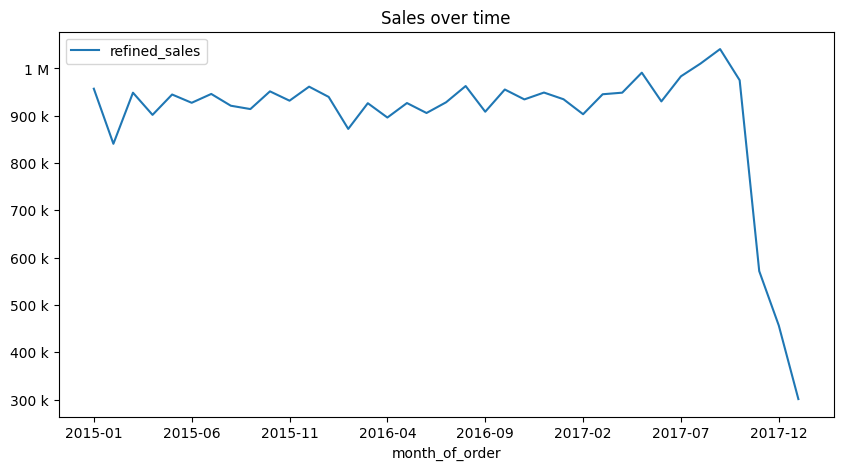

In [181]:
#Creating a line chart for Sales on DateOrders (timeline)
monthly_sale = df.groupby(df['month_of_order'])['refined_sales'].sum().reset_index()
#adding ".yaxis.set_major_formatter(ticker.EngFormatter(unit=''))" to display large number in "M" or "k" unit
monthly_sale.plot(kind='line', x='month_of_order', y='refined_sales', title='Sales over time', figsize=(10,5)).yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

*Comments:

- Sales suddenly dropped since middle 2017
- Sales is stable but not much growth from 2015 to Mid-2017

#####Sales by Department

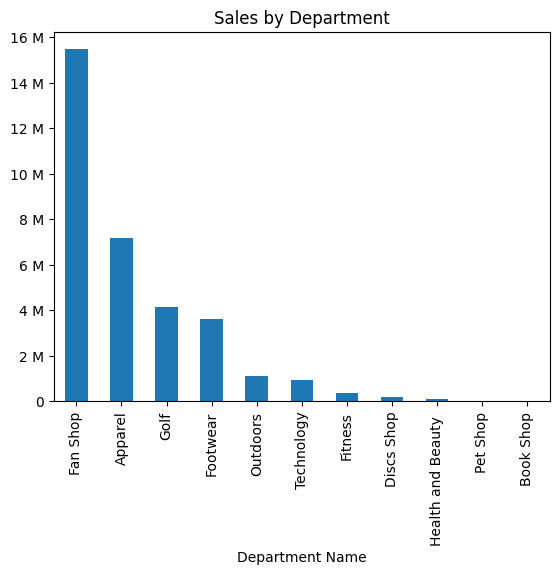

In [182]:
df.groupby(df['Department Name'],observed=True)['refined_sales'].sum().sort_values(ascending=False).plot(kind='bar', title='Sales by Department').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

In combination with Power BI, we discovered that the Sales are drop since 2017-Oct due to the disappear of many sale-leading department such as fan shop, apparel, etc. Instead, they getting sales from new department (since 2017-Oct) including Technology, Health and Beauty, Fitness only.

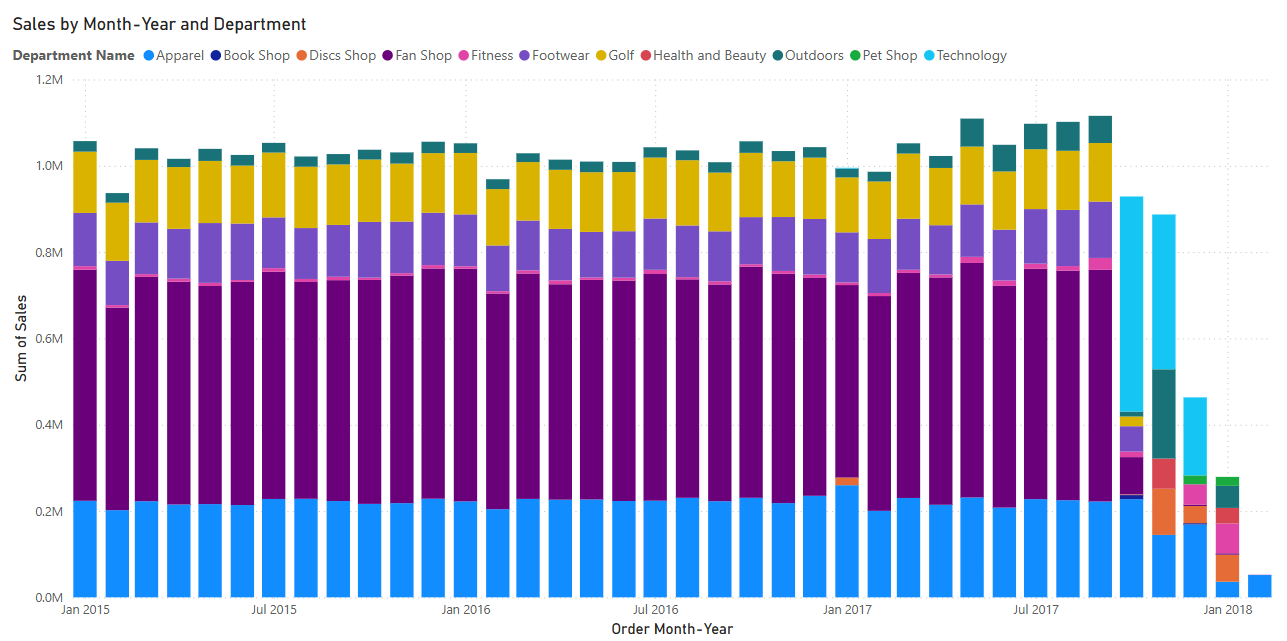

#####Sales Country comparison (US mainland and Puerto Rico)

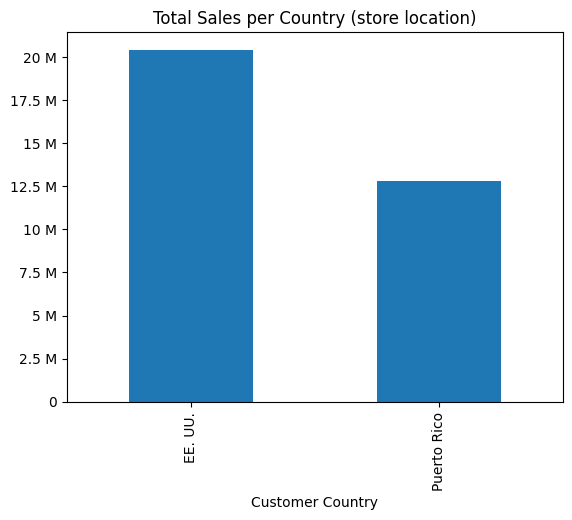

In [183]:
df.groupby(df['Customer Country'],observed=True)['refined_sales'].sum().head(10).plot(kind='bar', title='Total Sales per Country (store location)').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

#####Displaying the top 10 Sales by Stores Location (cities)

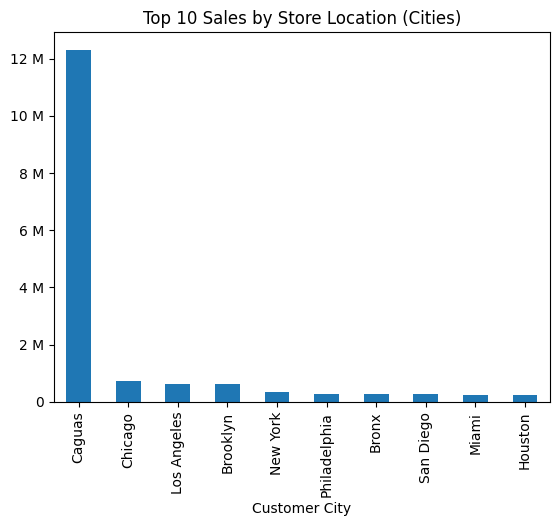

In [184]:
df.groupby(df['Customer City'],observed=True)['refined_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Sales by Store Location (Cities)').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

We can also examine this heatmap which shows where the most purchase was made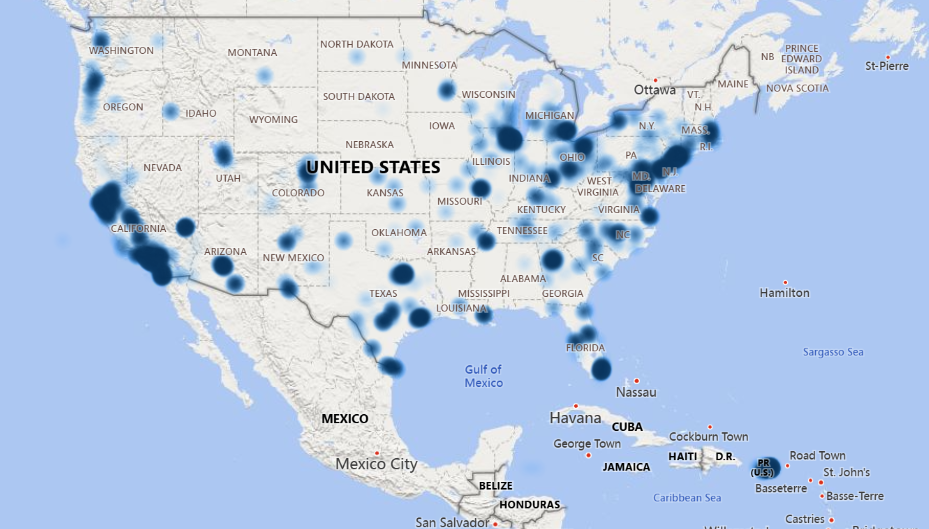

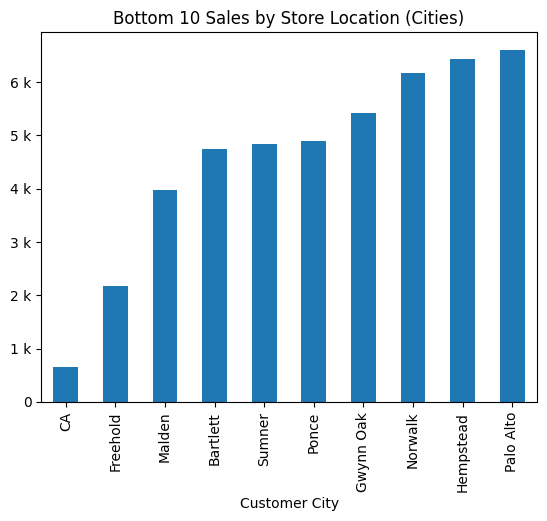

In [185]:
df.groupby(df['Customer City'],observed=True)['refined_sales'].sum().sort_values(ascending=True).head(10).plot(kind='bar', title='Bottom 10 Sales by Store Location (Cities)').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

In [186]:
print(df[['Customer City','Department Name','DateOrders']][df['Customer City'].isin(['CA','Freehold','Malden','Bartlett','Summer','Ponce','Gwynn Oak'])])

       Customer City Department Name          DateOrders
3360           Ponce         Apparel 2015-02-26 03:46:00
3415           Ponce        Fan Shop 2015-02-26 03:46:00
3419           Ponce        Fan Shop 2015-02-26 03:46:00
4591        Bartlett            Golf 2015-05-30 08:43:00
4631        Bartlett            Golf 2015-05-30 08:43:00
...              ...             ...                 ...
172068     Gwynn Oak        Footwear 2015-09-29 07:51:00
172272     Gwynn Oak            Golf 2016-07-07 04:18:00
173540         Ponce         Apparel 2017-07-29 17:15:00
173614         Ponce        Fan Shop 2017-07-29 17:15:00
177788        Malden        Fan Shop 2015-06-07 01:21:00

[120 rows x 3 columns]


#####Sale by Market, Region, Countries and Cities (top 10)

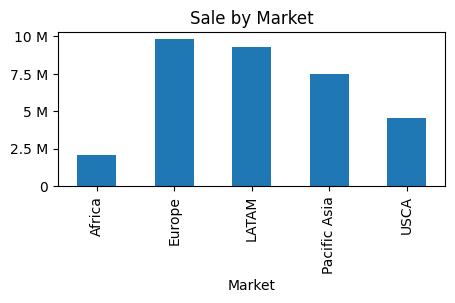

In [187]:
df.groupby('Market')['refined_sales'].sum().plot(kind='bar', title='Sale by Market', figsize=(5,2)).yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

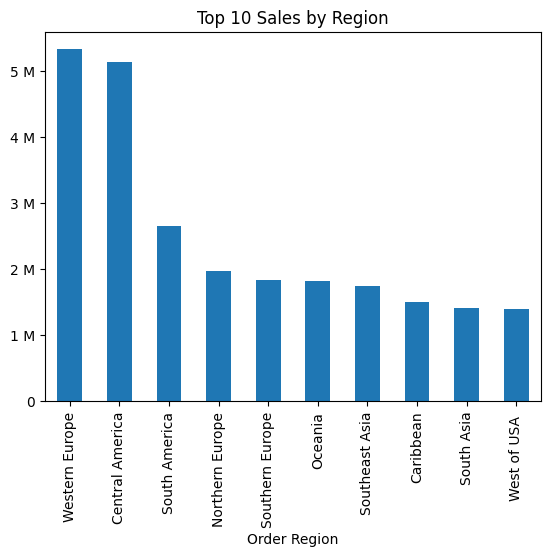

In [188]:
#Bar charting for top 10 Sales by Region
df.groupby(df['Order Region'],observed=True)['refined_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Sales by Region').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

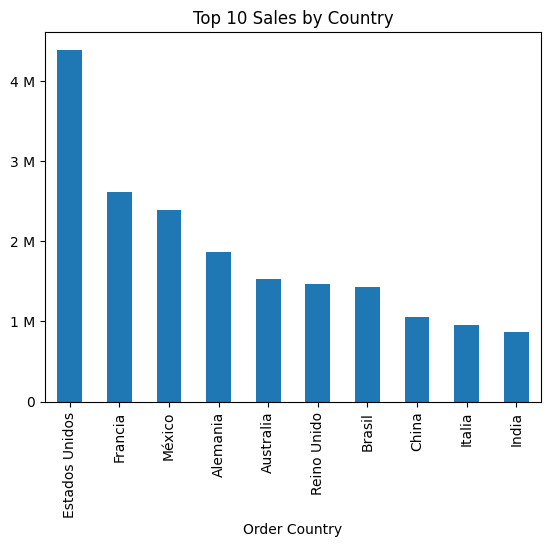

In [189]:
#Bar charting for top 10 Sales by Country
df.groupby(df['Order Country'],observed=True)['refined_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Sales by Country').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

Note: since this datasets encoded in Latin for spanish. I would like to add some translation:
- Estados Unidos: the USA
- Francia: France
- Reino Unido: United Kingdom

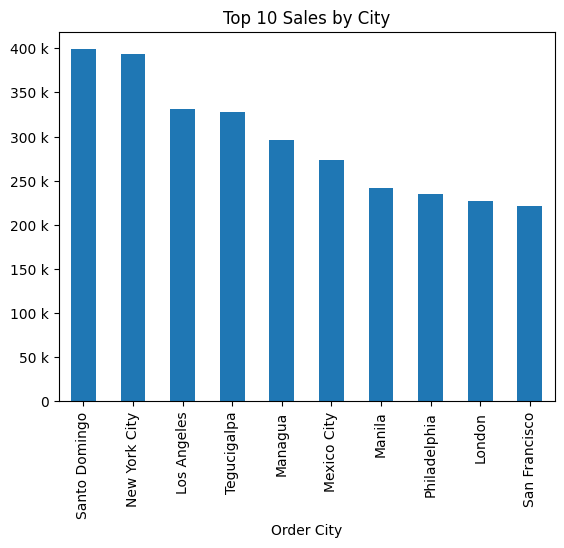

In [190]:
#top 10 sales by cities
df.groupby(df['Order City'],observed=True)['refined_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Sales by City').yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

#####Sale by Shipping Mode

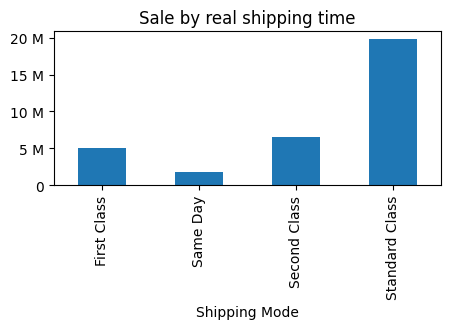

In [191]:
df.groupby('Shipping Mode',observed=False)['refined_sales'].sum().plot(kind='bar', title='Sale by real shipping time', figsize=(5,2)).yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

#####Sale by Real delivery Time

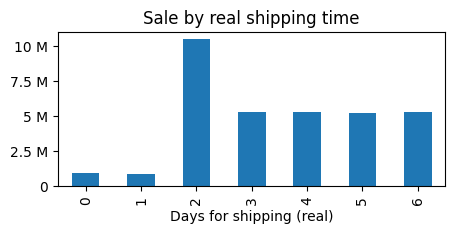

In [192]:
df.groupby('Days for shipping (real)',observed=False)['refined_sales'].sum().plot(kind='bar', title='Sale by real shipping time', figsize=(5,2)).yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

#####Sale by Delivery Status

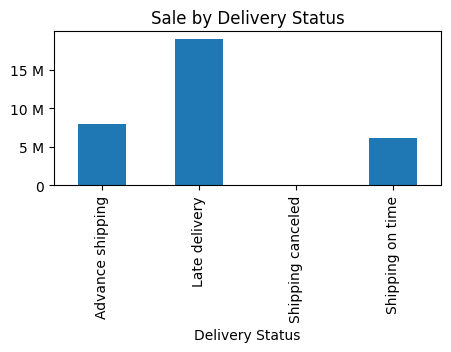

In [193]:
df.groupby('Delivery Status',observed=False)['refined_sales'].sum().plot(kind='bar', title='Sale by Delivery Status', figsize=(5,2)).yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

#####Sale by Customer Segment

In [194]:
df.groupby('Customer Segment',observed=True)['refined_sales'].sum()

,refined_sales
Customer Segment,
Consumer,1.721449e+07
Corporate,1.012391e+07
Home Office,5.894496e+06


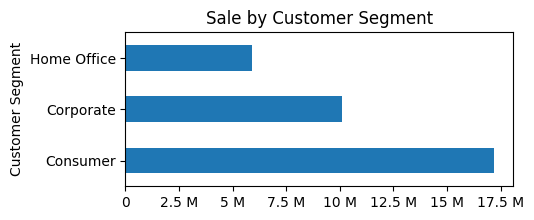

In [195]:
df.groupby('Customer Segment',observed=True)['refined_sales'].sum().plot(kind='barh', title='Sale by Customer Segment', figsize=(5,2)).xaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

in addition, as we calculated, the Repeat Customer Rate reach 59.16% which is quite good. Compared with the average globally (source: Mobiloud survey)
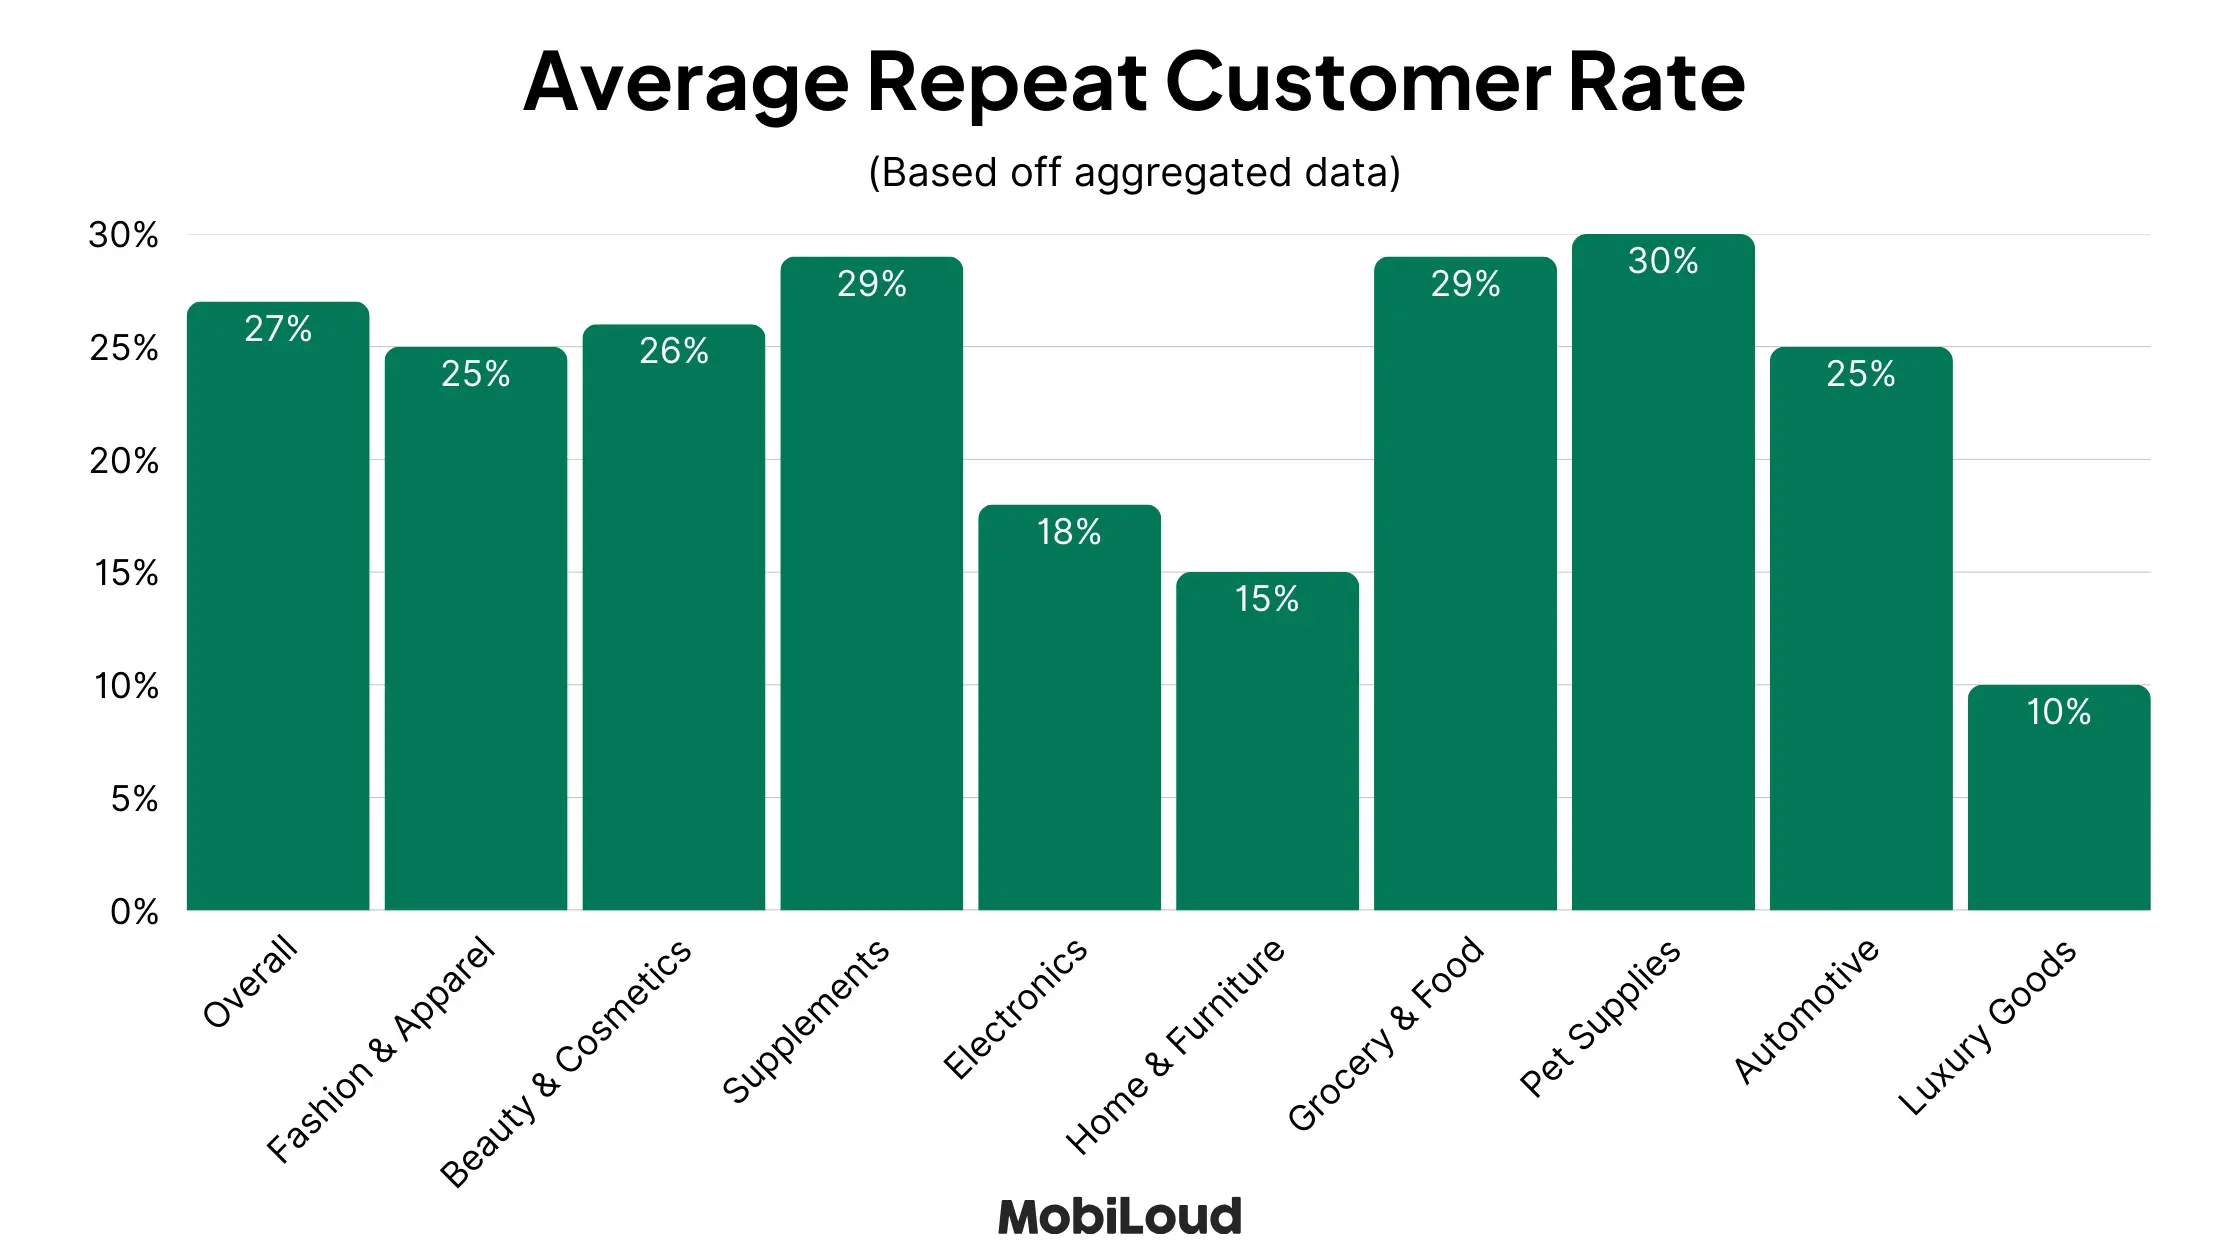

#####Sale by Transaction Type

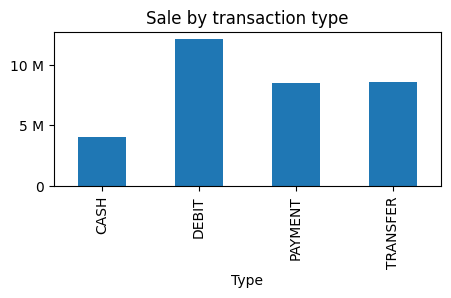

In [196]:
df.groupby('Type',observed=False)['refined_sales'].sum().plot(kind='bar', title='Sale by transaction type', figsize=(5,2)).yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.show()

---

###Customer Information
- Customer City, State, Country: Address details of the customer.
- Customer Segment: Classification (e.g., Consumer, Corporate).


In [197]:
# Select the columns and drop duplicates to get unique customer and country pairs
unique_customer_country = df[['Customer Id', 'Customer City']].drop_duplicates(subset=['Customer Id'])
unique_customer_country.head()

,Customer Id,Customer City
0,20755,Caguas
1,19492,Caguas
2,19491,San Jose
3,19490,Los Angeles
4,19489,Caguas


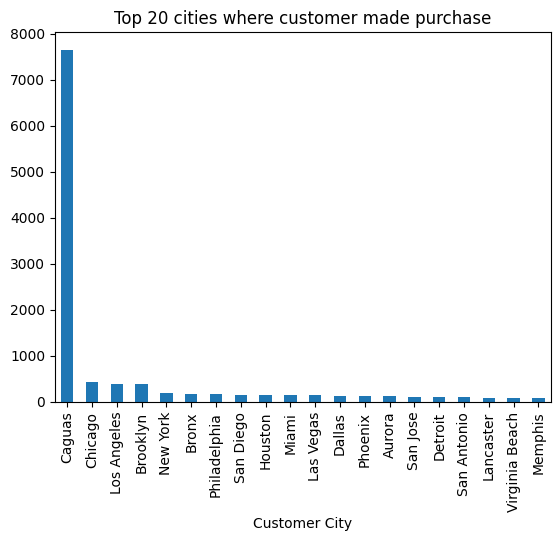

In [198]:
#draw bar chart to show customers' countries, note that EE.UU. is Spanish abbreviation for the United States
unique_customer_country['Customer City'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', title="Top 20 cities where customer made purchase")
plt.show()

The main location is Caguas city where customers made the tremendous amount of purchase

In [199]:
#calculate the Sales Proportion from Caguas city
print("Sales Proportion From Caguas city:", str(round(df['Sales'][df['Customer City']=='Caguas'].sum()/df['Sales'].sum()*100,2))+"%")

Sales Proportion From Caguas city: 37.0%


In [200]:
# Select the columns and drop duplicates to get unique customer and segment pairs
unique_customer_segment = df[['Customer Id', 'Customer Segment']].drop_duplicates(subset=['Customer Id'])
unique_customer_segment.head()

,Customer Id,Customer Segment
0,20755,Consumer
1,19492,Consumer
2,19491,Consumer
3,19490,Home Office
4,19489,Corporate


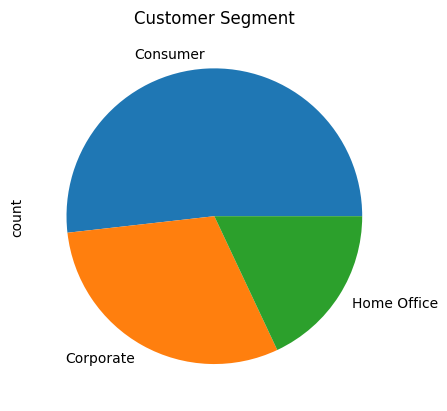

In [201]:
unique_customer_segment['Customer Segment'].value_counts().plot(kind='pie',title='Customer Segment')
plt.show()

Comment: the above segments' proportion is quite common for retailers.

###Product Information
- Product Name: Name of the product.
- Product Price: Price of the product.
- Product Category Name: Product and category identifiers.

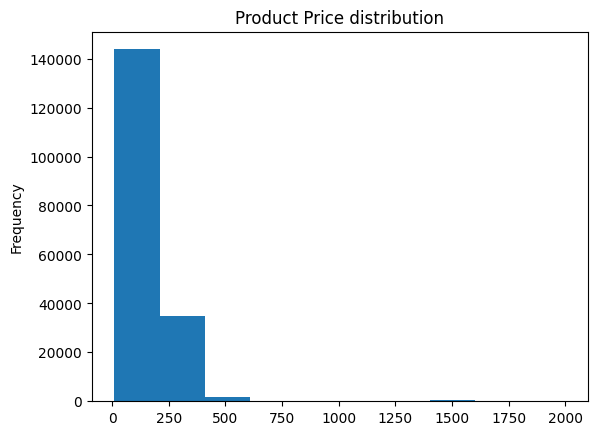

In [202]:
#build histogram to show Product Price distribution:
df['Product Price'].plot(kind='hist', title='Product Price distribution')
plt.show()

Comment: we can observe that more than 70% of product price is lower than 250. How about their sales proportion ? (calculated as below)

In [203]:
#calculate the sales from lower price product (price<250) compared with total sales
lower_price_profit = df['Order Profit Per Order'][df['Product Price']<250].sum()/df['Order Profit Per Order'].sum()
print("% Profit from lower price product:", str(round(lower_price_profit*100,2))+"%" )

% Profit from lower price product: 64.03%


The proportion between Price range and Profit is normal (since ~70% of product bring 64% of profit).

###Delivery and Order Status
- Delivery Status: Status (e.g., Advance shipping, delayed).
- Late_delivery_risk: Indicator of delayed delivery risk.
- Order Status: Order completion status (e.g., COMPLETE, PENDING).


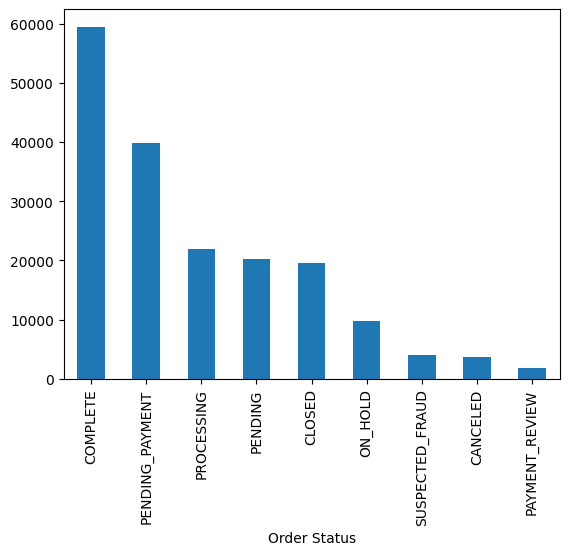

In [204]:
#Plotting the Order Status
df['Order Status'].value_counts().plot(kind='bar')
plt.show()

### Plotting Shipping Details
- Days for shipping (real): Actual days taken for delivery.
- Days for shipment (scheduled): Scheduled delivery days.
- Shipping date (DateOrders): Shipment date and time.
- Shipping Mode: Shipping options (e.g., First Class, Second Class)
- Order City / Country / State / Region: Delivery location details.


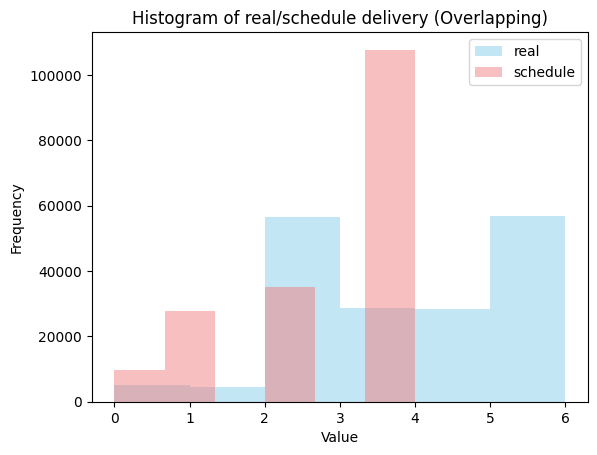

In [205]:
#Build histogram to compare Real vs. Schedule delivery days:
plt.hist(df['Days for shipping (real)'], bins=6, alpha=0.5, label='real', color='skyblue')
plt.hist(df['Days for shipment (scheduled)'], bins=6, alpha=0.5, label='schedule', color='lightcoral')

plt.title('Histogram of real/schedule delivery (Overlapping)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Comment:

The histogram above suggests that many schedule delivery doesn't match the practice. Hence, its precision is questionable.

For customers service satisfaction, we should inform customer the actual average delivery days.

In [206]:
#Calculate average delivery days actual and schedule
avg_real_shipping = df['Days for shipping (real)'].mean()
avg_schedule_shipping = df['Days for shipment (scheduled)'].mean()
print("Average Actual delivery days:",round(avg_real_shipping,2))
print("Average Schedule delivery days:",round(avg_schedule_shipping,2))
print("Different between Planning and Actual delivery days:", round(avg_real_shipping-avg_schedule_shipping,2))

Average Actual delivery days: 3.5
Average Schedule delivery days: 2.93
Different between Planning and Actual delivery days: 0.57


As we observed above, there is a half-day diffence between schedule and real delivery days. This is popular in long-distance shipping. However, this might affect the "late delivery" status.

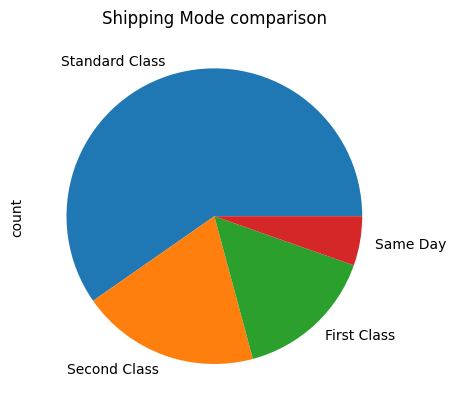

In [207]:
#pie chart for shipping mode
df['Shipping Mode'].value_counts().plot(kind='pie', title='Shipping Mode comparison')
plt.show()

Comment: more than half of shipping use Standard class.

-> Does this option affect the late delivery risk

-> Does this option affect all Order Country (delivery countries) or only severals of them?

-> What is the average delivery days actual vs. schedule

In [208]:
print("Proportion (%) of using Standard Class:", str(round(len(df['Shipping Mode'][df['Shipping Mode']=='Standard Class'])/len(df['Shipping Mode'])*100,2))+"%")

Proportion (%) of using Standard Class: 59.69%


Comment: As we calculated in section [Main KPI for Sale] that Late Delivery Rate: 54.83% while using Standard shipping mode around 57%

This coincidence might be related. Let's examine later.


In [209]:
df[['Type','Order Status']].groupby('Order Status',observed=True).value_counts()

Order Status     Type    
CANCELED         TRANSFER     3692
                 CASH            0
                 DEBIT           0
                 PAYMENT         0
CLOSED           CASH        19616
                 DEBIT           0
                 PAYMENT         0
                 TRANSFER        0
COMPLETE         DEBIT       59491
                 CASH            0
                 PAYMENT         0
                 TRANSFER        0
ON_HOLD          DEBIT        9804
                 CASH            0
                 PAYMENT         0
                 TRANSFER        0
PAYMENT_REVIEW   PAYMENT      1893
                 CASH            0
                 DEBIT           0
                 TRANSFER        0
PENDING          TRANSFER    20227
                 CASH            0
                 DEBIT           0
                 PAYMENT         0
PENDING_PAYMENT  PAYMENT     39832
                 CASH            0
                 DEBIT           0
                 TRANSFER        0
PROCESSING       TRANSFER    21902
                 CASH            0
                 DEBIT           0
                 PAYMENT         0
SUSPECTED_FRAUD  TRANSFER     4062
                 CASH            0
                 DEBIT           0
                 PAYMENT         0
Name: count, dtype: int64

---

### Late Delivery Examination

####Calculate the Late Delivery rate of each shipping mode

In [210]:
df_shipping_results = df[['Shipping Mode','Delivery Status']].groupby('Shipping Mode',observed=False).value_counts().reset_index()
df_shipping_results

,Shipping Mode,Delivery Status,count
0,First Class,Late delivery,26513
1,First Class,Shipping canceled,1301
2,First Class,Advance shipping,0
3,First Class,Shipping on time,0
4,Same Day,Shipping on time,4839
5,Same Day,Late delivery,4454
6,Same Day,Shipping canceled,444
7,Same Day,Advance shipping,0
8,Second Class,Late delivery,26987
9,Second Class,Shipping on time,6819


In [211]:
#Calculate total trip made by each shipping mode:
first_class_count = df_shipping_results['count'][df_shipping_results['Shipping Mode']=='First Class'].sum()
sameday_class_count = df_shipping_results['count'][df_shipping_results['Shipping Mode']=='Same Day'].sum()
second_class_count = df_shipping_results['count'][df_shipping_results['Shipping Mode']=='Second Class'].sum()
std_class_count = df_shipping_results['count'][df_shipping_results['Shipping Mode']=='Standard Class'].sum()

In [212]:
#Count [late delivery] trip each shipping mode:
first_class_late = df_shipping_results['count'][(df_shipping_results['Shipping Mode']=='First Class') & (df_shipping_results['Delivery Status']=='Late delivery')]
sameday_class_late = df_shipping_results['count'][(df_shipping_results['Shipping Mode']=='Same Day') & (df_shipping_results['Delivery Status']=='Late delivery')]
second_class_late = df_shipping_results['count'][(df_shipping_results['Shipping Mode']=='Second Class') & (df_shipping_results['Delivery Status']=='Late delivery')]
std_class_late = df_shipping_results['count'][(df_shipping_results['Shipping Mode']=='Standard Class') & (df_shipping_results['Delivery Status']=='Late delivery')]

In [213]:
#Calculate "Late Delivery" Ratio for each class, rounded to 2 decimals:
first_ratio = round(first_class_late/first_class_count,2)
sameday_ratio = round(sameday_class_late/sameday_class_count,2)
second_ratio = round(second_class_late/second_class_count,2)
std_ratio = round(std_class_late/std_class_count,2)

In [214]:
#print out the numbers
print(first_ratio)
print(sameday_ratio)
print(second_ratio)
print(std_ratio)

0    0.95
Name: count, dtype: float64
5    0.46
Name: count, dtype: float64
8    0.77
Name: count, dtype: float64
13    0.38
Name: count, dtype: float64


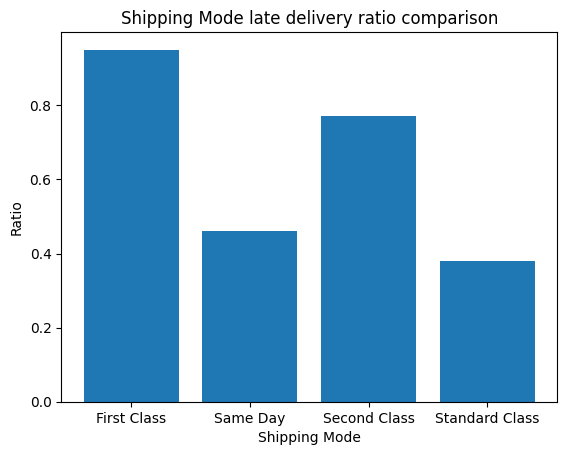

In [215]:
#build barchart for Late Delivery ratio
shipping_mode = ["First Class","Same Day","Second Class","Standard Class"]
late_ratio = [0.95,0.46,0.77,0.38]

plt.bar(shipping_mode,late_ratio)
plt.xlabel('Shipping Mode')
plt.ylabel('Ratio')
plt.title('Shipping Mode late delivery ratio comparison')

plt.show()

Comment: based on the results, Standard Class turned out to be the mode with lowest Late Delivery outcome.
While First Class and Second Class shipping mode didn't perform well.

####Create data for Late Delivery to consider its characteristics

In [229]:
#make a df_late_delivery for examination
df_late_delivery = df[df['Delivery Status']=='Late delivery'].reset_index()
df_late_delivery.head()

,index,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order State,Order Status,Product Name,Product Price,Shipping Mode,DateOrders,DateShipping,date_of_order,month_of_order,refined_sales
0,1,TRANSFER,5,4,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,Rajastán,PENDING,Smart watch,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018-01-13,2018-01,327.75
1,6,DEBIT,2,1,288.420013,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,Guangdong,COMPLETE,Smart watch,327.75,First Class,2018-01-13 10:42:00,2018-01-15 10:42:00,2018-01-13,2018-01,327.75
2,7,TRANSFER,2,1,285.140015,Late delivery,1,Sporting Goods,Miami,EE. UU.,...,Guangdong,PROCESSING,Smart watch,327.75,First Class,2018-01-13 10:21:00,2018-01-15 10:21:00,2018-01-13,2018-01,327.75
3,8,CASH,3,2,278.589996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,Guangdong,CLOSED,Smart watch,327.75,Second Class,2018-01-13 10:00:00,2018-01-16 10:00:00,2018-01-13,2018-01,327.75
4,9,CASH,2,1,275.309998,Late delivery,1,Sporting Goods,San Ramon,EE. UU.,...,Guangdong,CLOSED,Smart watch,327.75,First Class,2018-01-13 09:39:00,2018-01-15 09:39:00,2018-01-13,2018-01,327.75


####Calculate process time between Late & On-time delivery scenarios:

In [231]:
#adding process time for late delivery
df_late_delivery['process_time'] = df_late_delivery['DateShipping']-df_late_delivery['DateOrders']
avg_late_delivery_process_time = df_late_delivery['process_time'].mean()
print("Average process time when late delivery:",avg_late_delivery_process_time)

Average process time when late delivery: 4 days 01:36:07.449003303


In [237]:
#make a df_on_time_delivery and calculate the process time where delivery on-time:
df_on_time_delivery = df[~df['Delivery Status'].isin(['Late delivery','Shipping canceled'])].reset_index()
df_on_time_delivery['process_time'] = df_on_time_delivery['DateShipping']-df_on_time_delivery['DateOrders']
avg_on_time_delivery_process_time = df_on_time_delivery['process_time'].mean()
print("Average process time when on-time delivery:", avg_on_time_delivery_process_time)

Average process time when on-time delivery: 2 days 17:44:17.993169621


Comment: Average Order Processing Time 4 days will often lead to late delivery. The target for optimization is 2 days.

####Top region where late delivery

<Axes: title={'center': 'Late delivery regions'}, xlabel='Order Region'>

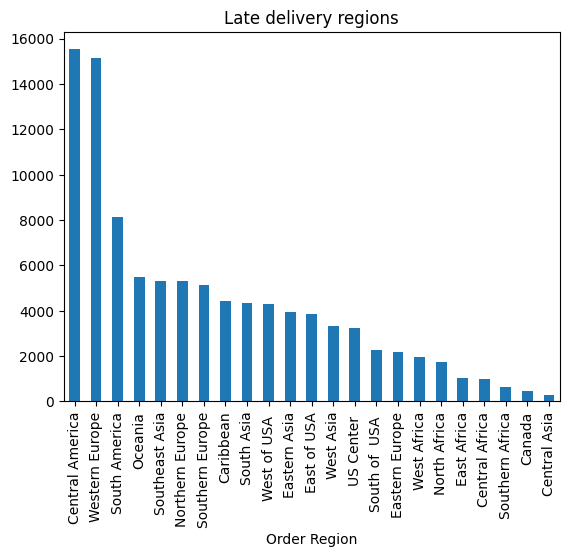

In [217]:
# top region where late delivery
df_late_delivery['Order Region'].value_counts().sort_values(ascending=False).plot(kind='bar',title='Late delivery regions')

####Late delivery by Customer Segment

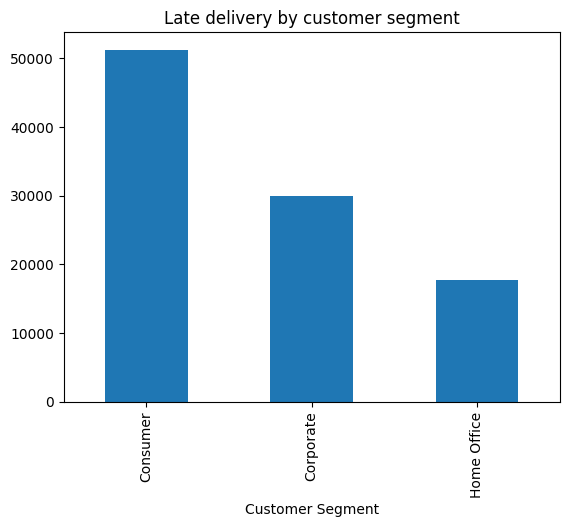

In [218]:
df_late_delivery['Customer Segment'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Late delivery by customer segment')
plt.show()

####Late delivery by shipping (count)

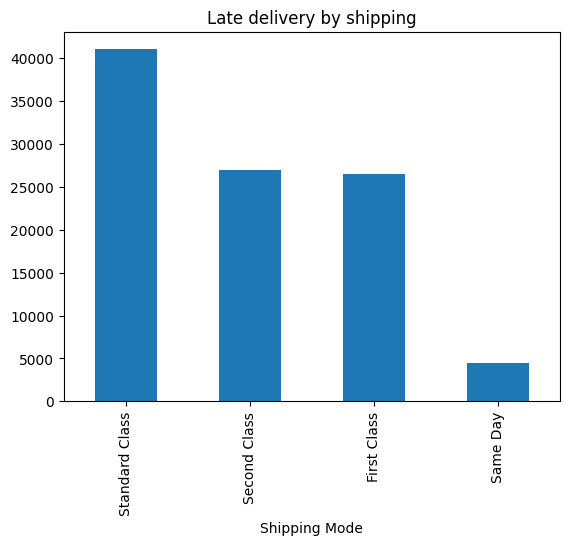

In [219]:
df_late_delivery['Shipping Mode'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Late delivery by shipping')
plt.show()

####Top 20 late delivery product category

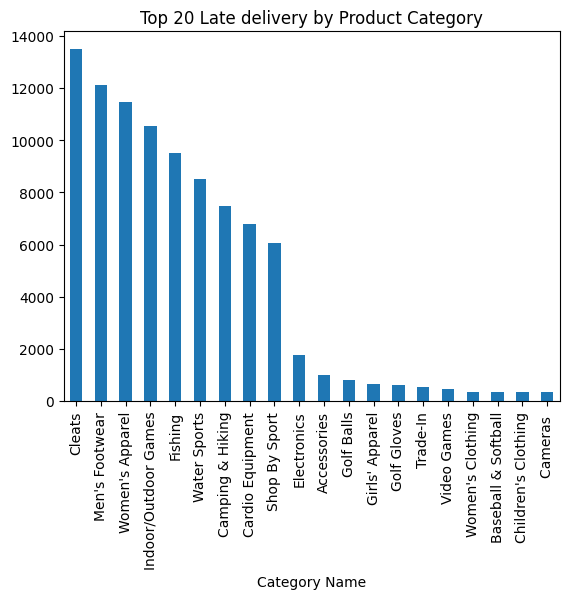

In [220]:
df_late_delivery['Category Name'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', title='Top 20 Late delivery by Product Category')
plt.show()

####Creating line-chart for Late Delivery Rate over time

In [221]:
#Creating a table Late Delivery to sum up the Late_delivery_risk
monthly_late = df.groupby(df['month_of_order'])['Late_delivery_risk'].sum().reset_index()
monthly_late.head()

,month_of_order,Late_delivery_risk
0,2015-01,2880
1,2015-02,2594
2,2015-03,2936
3,2015-04,2760
4,2015-05,2951


In [222]:
#creat a table to sum-up the total quantity of order each month
monthly_order = df.groupby(df['month_of_order'])['Order Id'].count().reset_index()
monthly_order.head()

,month_of_order,Order Id
0,2015-01,5322
1,2015-02,4729
2,2015-03,5362
3,2015-04,5126
4,2015-05,5357


In [223]:
#merge two table above and add a late_ratio column
monthly_late_ratio = pd.merge(monthly_late,monthly_order,on='month_of_order',how='left')
monthly_late_ratio['late_ratio'] = round(monthly_late_ratio['Late_delivery_risk']/monthly_late_ratio['Order Id'],2)
monthly_late_ratio.head()

,month_of_order,Late_delivery_risk,Order Id,late_ratio
0,2015-01,2880,5322,0.54
1,2015-02,2594,4729,0.55
2,2015-03,2936,5362,0.55
3,2015-04,2760,5126,0.54
4,2015-05,2951,5357,0.55


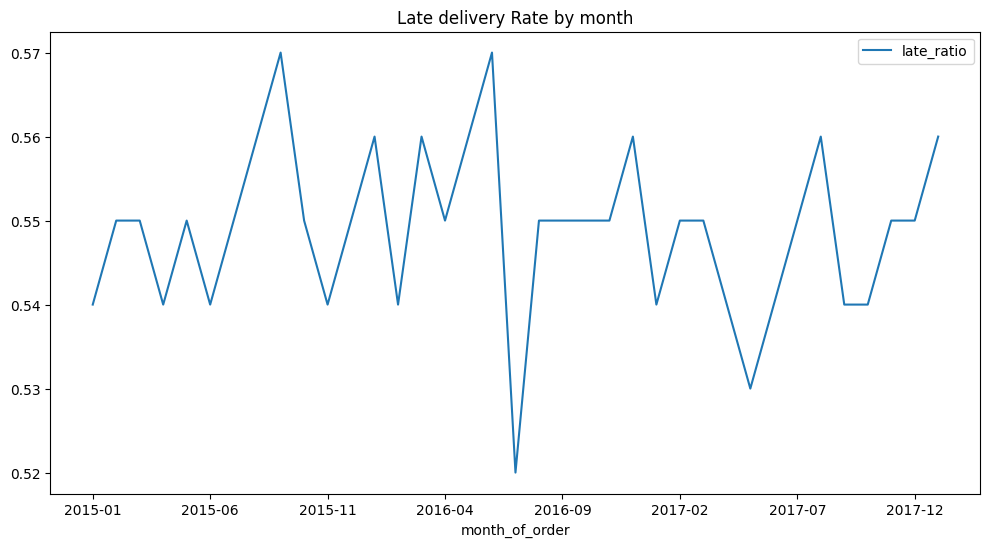

In [224]:
#Plot the Late Delivery Rate by month
monthly_late_ratio.plot(kind='line', x='month_of_order', y='late_ratio', title='Late delivery Rate by month',figsize=(12,6))
plt.show()

The graph above shows that Late Delivery rate is fluctuating between 52%~57%. And following a pattern as: stable in the early to middle year stage and increase near the end of each year.

..

#Conclusion & Insights
---

## Conslusion on general states of the company sales and delivery
- Sales are stable but not growing much in the period of 2015-2017. Since 2017-Oct, the sales dropped tragically almost -90%.
- Average sales per month is around 898k.
- The company total sales accumulated 33m till early 2018
- While the customers are globally located, its highest sales are from Europe and America regions.
- The customer segments include Corporate, Home Office and the Consumer which take half of the proportion
- Their stores are located mostly in the US and Puerto Rico (a country in the Caribbean area).
- There is also a huge gap for sales between their stores. The total sales from Caguas (in Puerto Rico) is over 12m. It’s 2x times over the combination of other 9 cities in the top 10 sales city.
- Their top 5 departments generate the most sales are: Fan Shop, Apparel, Golf, Footwear and Outdoors.

- As of shipping, they have 4 modes including: Standard, First class, second class and same-day. Standard class is widely applied with more than 59% cases.
- For delivery time, their most sales generated from 2-days length delivery. The time mostly ranges between 2-6 days.

## Their current noticable issues
- Sales have been dropping tragically since late 2017. Within a year, their sales dropped almost -90%.
- They are facing a late delivery situation with the late delivery rate being 54.83%. In comparison with the top world companies which are often <10%, their number is terrible.


##The most possible causes for each issue:
- For dropping sales:

  The sales are drop since 2017-Oct due to the disappear of many sale-leading department such as fan shop, apparel, etc. Instead, they getting sales from new department (since 2017-Oct) such as Technology, Health and Beauty, Fitness only.

- For high Late Delivery Rate:

  The rate remain fluctuating between 52% and 56% during 2015-2017 and seems to be increasing in late 2017.
  Late Delivery Rate is affected by many factors. In the scope of our available data, we may point out these causes:
  - Long processing time from order to actual shipping (4 days instead of the required 2 days)
  - Some special products require more shipping time than others (such as Cleats, Men's footwear, Women's apparel etc.)
  - Shipping Classes have been under-performing. Especially First and Second Classed are often late while they are supposed to be on-time or advanced.
  - The schedule shipping time is not precise. Especially for 1-2 days delivery orders.
  We need to improve the precision and should consider more about actual average shipping time 3.5 days.

## Suggestions
- For sales:
  
  Because the limited of available data, we can't make conclusion on the disappear of leading sales department like fan shop and apparel.
  
  If we can bring back the sale-leading departments, the total number will recover.

- For delivery:
  
  We should focus more on improving Average Order Process Time from 4 days down to 2 days.
  
  We should re-qualifying premium shipping modes (First Class and Second Class).
  
  In addition, schedule shipping time also needs to be well considered before inputting.

  Finally, be well prepared around the end of year period since it often has more late delivery count than others.